In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [2.0, 3.0],
    [3.0, 2.0]
])

y = np.array([0, 0, 1, 1])


In [28]:
w = np.zeros(2)   # one weight per feature
b = 0

In [29]:
z = X @ w + b

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
z = X @ w + b
y_prob = sigmoid(z)

In [32]:
dw = (1 / len(X)) * X.T.dot(y_prob - y)
db = (1 / len(X)) * np.sum(y_prob - y)
print("dw:", dw)
print("db:", db)

dw: [-0.25 -0.25]
db: 0.0


In [33]:
lr = 0.1

w = w - lr * dw
b = b - lr * db

print("w:", w)
print("b:", b)

w: [0.025 0.025]
b: 0.0


In [34]:
z = X @ w + b
y_prob = sigmoid(z)

print("z:", z)
print("prob:", y_prob)

z: [0.075 0.075 0.125 0.125]
prob: [0.51874122 0.51874122 0.53120937 0.53120937]


In [35]:
y_pred = (y_prob >= 0.5).astype(int)
print("prediction:", y_pred)

prediction: [1 1 1 1]


In [87]:
epochs = 200
lr = 0.1
w = np.zeros(2)   # one weight per feature
b = 0
z_history = []
for epoch in range(epochs):
    z = X.dot(w) + b
    z_history.append(z.copy())
    print(f"{epoch} Iteration: {z}")
    y_prob = sigmoid(z)
    dw = (1 / len(X)) * X.T.dot(y_prob - y)
    db = (1 / len(X)) * np.sum(y_prob - y)

    w -= lr * dw
    b -= lr * db

print(f"Final w: {w}")
print(f"Final b: {b}")
final_z = X.dot(w) + b
final_prob = sigmoid(final_z)
final_pred = (final_prob >= 0.5).astype(int)
print(f"Final prob: {final_prob}")
print(f"Final pred: {(final_prob >= 0.5).astype(int)}")


0 Iteration: [0. 0. 0. 0.]
1 Iteration: [0.075 0.075 0.125 0.125]
2 Iteration: [0.13158218 0.13158218 0.22096866 0.22096866]
3 Iteration: [0.17416608 0.17416608 0.29487071 0.29487071]
4 Iteration: [0.20611738 0.20611738 0.35201021 0.35201021]
5 Iteration: [0.22997716 0.22997716 0.39639159 0.39639159]
6 Iteration: [0.24766188 0.24766188 0.43103488 0.43103488]
7 Iteration: [0.2606203  0.2606203  0.45822297 0.45822297]
8 Iteration: [0.26995156 0.26995156 0.47968779 0.47968779]
9 Iteration: [0.27649277 0.27649277 0.49674831 0.49674831]
10 Iteration: [0.28088376 0.28088376 0.51041265 0.51041265]
11 Iteration: [0.2836151  0.2836151  0.52145376 0.52145376]
12 Iteration: [0.28506398 0.28506398 0.53046588 0.53046588]
13 Iteration: [0.28552097 0.28552097 0.53790684 0.53790684]
14 Iteration: [0.2852104  0.2852104  0.54413005 0.54413005]
15 Iteration: [0.28430566 0.28430566 0.54940867 0.54940867]
16 Iteration: [0.28294093 0.28294093 0.55395412 0.55395412]
17 Iteration: [0.28122018 0.28122018 0.557

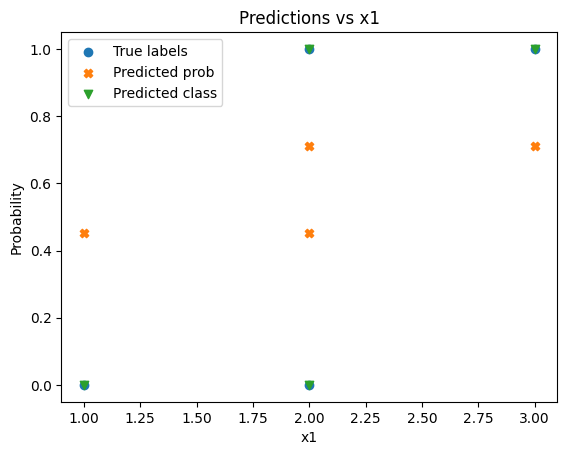

In [90]:
plt.figure()

plt.scatter(X[:,0], y, label="True labels")
plt.scatter(X[:,0], final_prob, marker="X", label="Predicted prob")
plt.scatter(X[:,0], final_pred, marker="v", label="Predicted class")

plt.xlabel("x1")
plt.ylabel("Probability")
plt.title("Predictions vs x1")
plt.legend()
plt.show()